In [1]:
#data source: https://www.federalreserve.gov/econres/scfindex.htm
#data dictionary: https://www.federalreserve.gov/econres/files/codebk2019.txt

In [2]:
#import necessary libaries
import pandas as pd
import matplotlib

In [3]:
#name file path (you will have download your own dataset and populate the path and choose the appropriate cell to execute)
file = 'asecpub21csv/p19i6.dta' # <-- edit this value! 

In [4]:
#read data from Stata (.dta) & print head
df = pd.read_stata(file)
print(df.head())

   j7398  j7578  j7579  j7019  j7020  j7001  j7050  j8020  j8021  j5908  ...  \
0      0      0      0      8      8      0      0      0      0      0  ...   
1      0      0      0      8      8      0      0      0      0      0  ...   
2      0      0      0      8      8      0      0      0      0      0  ...   
3      0      0      0      8      8      0      0      0      0      0  ...   
4      0      0      0      8      8      0      0      0      0      0  ...   

   j6768        x42000        x42001  j306  j11272  j11572  j33001  x306  \
0      1  30609.361546  30598.896539   NaN     NaN     NaN       0   NaN   
1      1  23575.752202  23561.874562   NaN     NaN     NaN       0   NaN   
2      1  25762.246741  25726.122276   NaN     NaN     NaN       0   NaN   
3      1  26511.942367  26488.317060   NaN     NaN     NaN       0   NaN   
4      1  23825.934782  23809.061856   NaN     NaN     NaN       0   NaN   

   x11272  x11572  
0     NaN     NaN  
1     NaN     NaN  
2 

In [5]:
#list columns in data frame
print(list(df))
print(len(df))

['j7398', 'j7578', 'j7579', 'j7019', 'j7020', 'j7001', 'j7050', 'j8020', 'j8021', 'j5908', 'j7005', 'j8022', 'j8023', 'j8024', 'j7000', 'j7021', 'j7002', 'j102', 'j103', 'j104', 'j105', 'j106', 'j107', 'j108', 'j110', 'j7006', 'j111', 'j112', 'j113', 'j114', 'j116', 'j7007', 'j117', 'j118', 'j119', 'j120', 'j122', 'j7008', 'j123', 'j124', 'j125', 'j126', 'j128', 'j7009', 'j129', 'j130', 'j131', 'j132', 'j134', 'j7010', 'j135', 'j136', 'j137', 'j202', 'j204', 'j7011', 'j205', 'j206', 'j207', 'j208', 'j210', 'j7012', 'j211', 'j212', 'j213', 'j214', 'j216', 'j7013', 'j217', 'j218', 'j219', 'j220', 'j222', 'j7014', 'j223', 'j224', 'j225', 'j226', 'j228', 'j7035', 'j229', 'j230', 'j231', 'j301', 'j7489', 'j7556', 'j7557', 'j7561', 'j7101', 'j7102', 'j7103', 'j7104', 'j7105', 'j7106', 'j7107', 'j7108', 'j7109', 'j7110', 'j6849', 'j6861', 'j6862', 'j6863', 'j7562', 'j7112', 'j7113', 'j7114', 'j7115', 'j7116', 'j7117', 'j7118', 'j7119', 'j7120', 'j7121', 'j6865', 'j6866', 'j6867', 'j6868', 'j4

In [15]:
#output frequency table of chosen column in dataset
col = 'j128' #<-edit this value! column name as it appears in dataframe
col_name = '(>V7,*):(>$10M,*)' #<-edit this value! descriptive name for column
freq = df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
freq = freq.sort_values(by = col_name)
print(freq)

   (>V7,*):(>$10M,*)   freq
1                  0   1145
0                  1  27695
3                  5      5
4                 13      5
2                 14     35


In [ ]:
#replace codes with descriptive labels
#if your dataframe already has descriptive labels, you don't need to run this cell
codebook = [['0', 'Children'], #<- if appropriate, replace these values based on codebook or data dictionary for your dataset
            ['31', 'Less than 1st grade'], 
            ['32', '1st,2nd,3rd,or 4th grade'], 
            ['33', '5th or 6th grade'], 
            ['34', '7th and 8th grade'], 
            ['35', '9th grade'], 
            ['36', '10th grade'], 
            ['37', '11th grade'], 
            ['38', '12th grade no diploma'], 
            ['39', 'High school graduate - high school diploma or equivalent'], 
              ['40', 'Some college but no degree'], 
            ['41', 'Associate degree in college - occupation/vocation'], 
            ['42', 'Associate degree in college - academic program'], 
            ['43', "Bachelor's degree (for example: BA,AB,BS)"], 
            ['44', "Master's degree"],
            ['45', 'Professional school degree'], 
            ['46', 'Doctorate degree']]
#loops through label codes and replaces them in frequency table
for lbl in codebook:
    #use line below if codes are stored as integers
    freq[col_name] = freq[col_name].replace(int(lbl[0]), lbl[1])
    #use line below if codes are stored as strings
    #freq[col_name] = freq[col_name].replace(lbl[0], lbl[1])
#prints updated frequency table
print(freq)

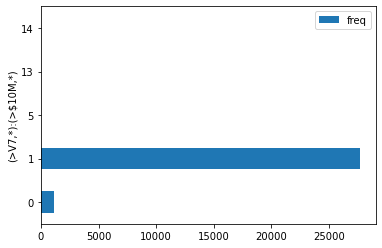

In [16]:
#create frequency chart
ax = freq.plot.barh(x=col_name, y='freq', rot=0)